In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [25]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1 - Extracting Tesla Stock Data Using yfinance


Using the `Ticker` module we can create an object that will allow us to access functions to extract data.

In [3]:
tesla = yf.Ticker("TSLA")

A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [28]:
tesla_share_price_data = tesla.history(period="max")

Reset the index of the DataFrame with the `reset_index` function and also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.

In [5]:
tesla_share_price_data.reset_index(inplace=True)
tesla_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping

Extract Tesla stock data. 

The requests.get() method takes a URL as its first argument, which specifies the location of the resource to be retrieved. In this case, the value of the url variable is passed as the argument to the requests.get() method, because you will store a web page URL in a url variable.

You use the .text method for extracting the HTML content as a string in order to make it readable.

In [6]:
tesla_revenue_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [7]:
data  = requests.get(tesla_revenue_url).text

## Parsing the data using the BeautifulSoup library
* Create a new BeautifulSoup object.
To create a BeautifulSoup object in Python, need to pass two arguments to its constructor:

1. The HTML or XML content that you want to parse as a string.
2. The name of the parser that you want to use to parse the HTML or XML content. This argument is optional, and if you don't specify a parser, BeautifulSoup will use the default HTML parser included with the library. we are using "html5lib" parser.


In [8]:
soup = BeautifulSoup(data, 'html5lib')

## Identify the HTML tags

In [9]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

## Use a BeautifulSoup method for extracting data

We will use <b>find()</b> and <b>find_all()</b> methods of the BeautifulSoup object to locate the table body and table row respectively in the HTML. 
   * The <i>find() method </i> will return particular tag content.
   * The <i>find_all()</i> method returns a list of all matching tags in the HTML.


In [10]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
index = 0
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Finally we append the data of each row to the table
    tesla_revenue.loc[index] = [date, revenue]
    index += 1

In [11]:
tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,
52,2009-09-30,$46
53,2009-06-30,$27


## Question 3 - Extracting GameStop Stock Data Using yfinance

In [12]:
game_stop = yf.Ticker("GME")

In [29]:
game_stop_share_price_data = game_stop.history(period="max")

In [14]:
game_stop_share_price_data.reset_index(inplace=True)
game_stop_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [15]:
game_stop_revenue_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [16]:
game_stop_revenue  = requests.get(game_stop_revenue_url).text

In [17]:
game_stop_soup = BeautifulSoup(game_stop_revenue, 'html5lib')

In [18]:
game_stop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [19]:
index = 0
for row in game_stop_soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Finally we append the data of each row to the table
    game_stop_revenue.loc[index] = [date, revenue]
    index += 1

In [30]:
game_stop_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5 - Tesla Stock and Revenue Dashboard

Remove the comma and dollar sign from the `Revenue` column and an null or empty strings in the Revenue column.

In [21]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace('$',"").str.replace(',',"")
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


/var/folders/9q/60j4pl696yjg6j2gjv6pq4800000gn/T/ipykernel_22593/2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/var/folders/9q/60j4pl696yjg6j2gjv6pq4800000gn/T/ipykernel_22593/2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



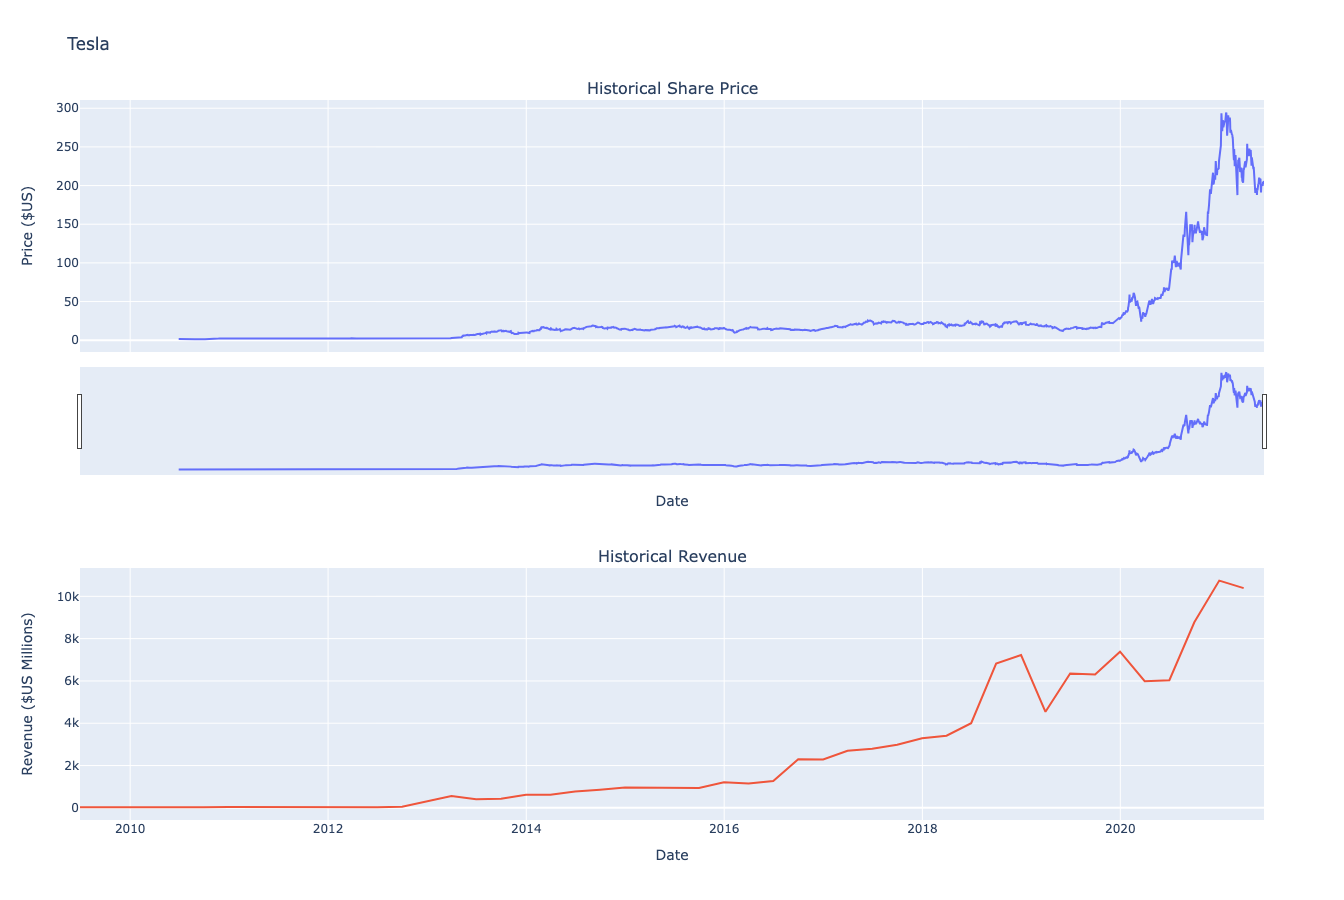

In [27]:
make_graph(tesla_share_price_data, tesla_revenue, 'Tesla')

## Question 6 - GameStop Stock and Revenue Dashboard

In [23]:
game_stop_revenue["Revenue"] = game_stop_revenue["Revenue"].str.replace('$',"").str.replace(',',"")
game_stop_revenue.dropna(inplace=True)

game_stop_revenue = game_stop_revenue[game_stop_revenue["Revenue"] != ""]
game_stop_revenue.head()

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


/var/folders/9q/60j4pl696yjg6j2gjv6pq4800000gn/T/ipykernel_22593/2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/var/folders/9q/60j4pl696yjg6j2gjv6pq4800000gn/T/ipykernel_22593/2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



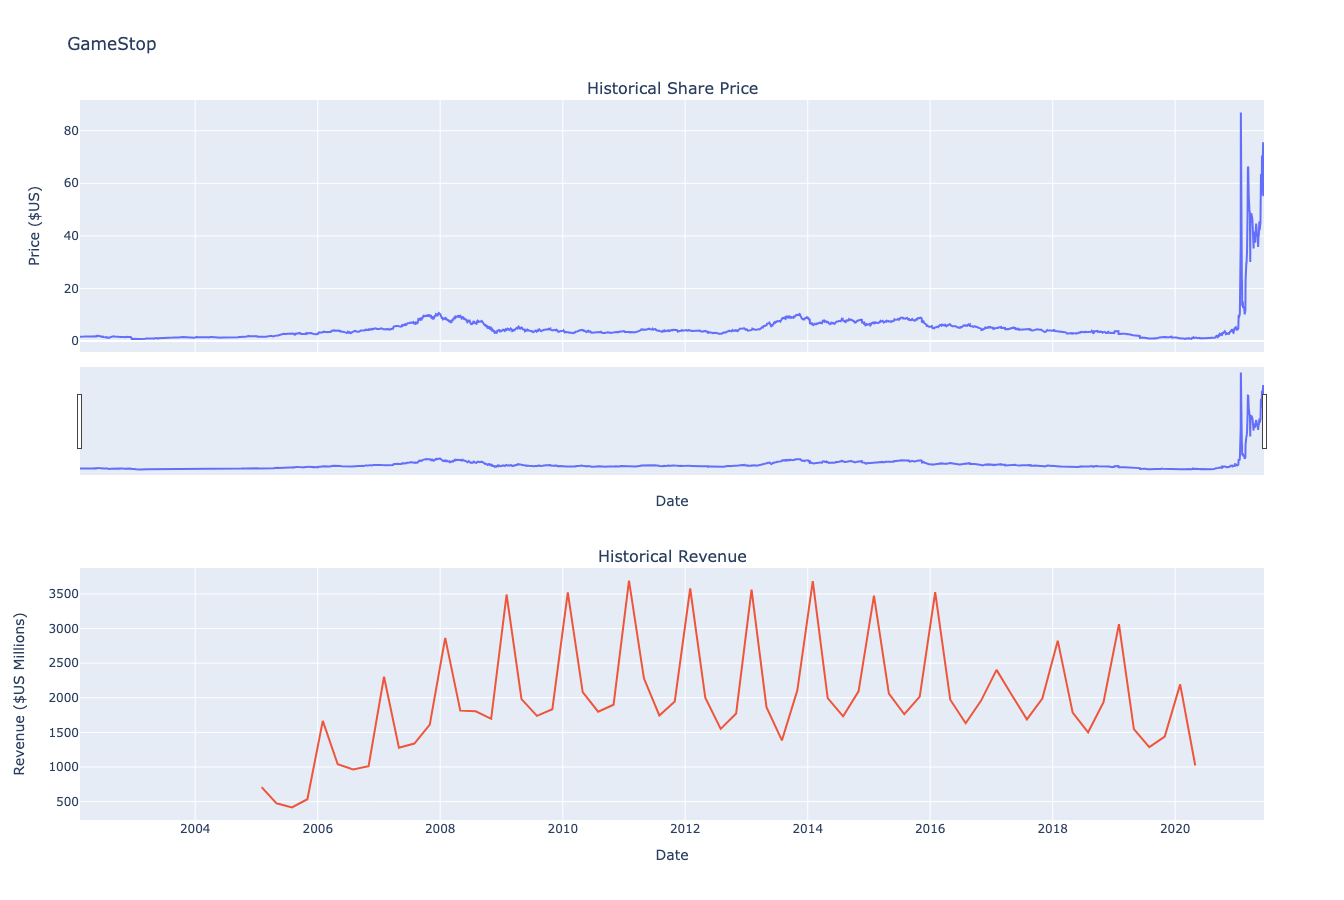

In [26]:
make_graph(game_stop_share_price_data, game_stop_revenue, 'GameStop')